# Hosting with Python

Author: Enzo Rocha;
Data scientist

## 1- Business Understanding

With the launch of Airbnb in 2008, there has been a huge growth in hosts over the years. The Airbnb Seattle dataset is a dataset that demonstrates some data collected from the launch in 2008 until the year 2016. This dataset is present in the kaggle: https://www.kaggle.com/airbnb/seattle/data .

* The database Calendar, including listing id and the price and availability for that day;
* The database Reviews, including unique id for each reviewer and detailed comments;
* The database Listings, including full descriptions and average review score.

This notebook is a technical part of the article : https://enzo-santanarocha.medium.com/se-hospedando-com-o-python-2ea7208dfd7a

### Import of librarians

In [3]:
import numpy as np # manipulação e análise de dados.
import pandas as pd # funções matemáticas
import matplotlib.pyplot as plt # gráficos e visualizações de dados
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
%matplotlib inline

from math import floor

### Importing bases with pandas

I imported all the bases present in the Kaggle link above, but the df_listing base.

In [4]:
df_calendar = pd.read_csv('seattle/calendar.csv')
df_listing = pd.read_csv('seattle/listings.csv')
df_reviews = pd.read_csv('seattle/reviews.csv')

## 2- Data Understanding

* df_calendar have 1393570 rows and 4 columns. 1 int, 3 object.
* df_listing have 3818 rows and 92 columns. 23 float, 13 int , 56 object.
* df_listing have 3818 rows and 92 columns. 3 int , 3 object.

## 3- Data Preparation

#### listing

df_listing is a main base that we will use. It is possible to observe a variable with "%" and "$". It's a problem for work
with the numbers. With that, it was necessary to create a function to convert all variables that are not float. This function (tofloat()) receives the base dataframe that has as variables that we want to transform and a list of these variables, respectively. 

In [5]:
def tofloat(df, list_columns):
    '''
    INPUT:
    df - DataFrame pandas that contain all variables that we want change. 
    list_columns- list of variables. you can enter any number of variables, but it must be on the list.
    
    OUTPUT:
    df - The same dataframe, but without "%", "$" and ",", if they have in the variables
    '''
    
    for i in list_columns:
            df[i] = (df[i].astype(str).apply(
                lambda x: (x.replace("$","").replace("%","").replace(",","")))).astype(float)
    return df

#input a list with the variables that you want make a change of string to float 
list_columns= ['price','extra_people','cleaning_fee','security_deposit','review_scores_value',
               'review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin','review_scores_communication','review_scores_location',
              'host_acceptance_rate','host_response_rate']

#input here the database where you want make the change
df= df_listing 

tofloat(df, list_columns).head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96.0,100.0,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98.0,100.0,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,"$1,000.00","$3,000.00",100.0,40.0,1,0.0,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water

## 4 - Data Functions

I opted for forecasting models for other projects. Here, I want to further explore the vision and discuss the responses to reality without making any statistical models. My questions about the base did not require changes.

In [30]:
def plot_varyear(df, var_date,var_plot):
    '''
    INPUT:
        df = type(DataFrame) Dataframe that you would like to use.
        var_date = type(string) variable on the date you want to extract the year to create the year variable.
        var_plot =  type(string) The variable you want to plot per year
        
    OUTPUT:
        plot = of the var_plot per year
        base_vizinho = Base de entrada reduzida com todas as 10 primeiras vizinhanças.
    '''
    # creating year variable
    df['year'] = pd.DatetimeIndex(df[var_date]).year
    
    #I take only the 10 points with the most hosts
    lista_vizinho = list(df[var_plot].value_counts().reset_index()['index'].iloc[:10])
    
    # concatenating only the top 10 in a dataframe
    base_vizinho= pd.DataFrame()    
    for i in lista_vizinho:
        base_vizinho= pd.concat([df[df[var_plot]==i],base_vizinho])
    
    return (sns.displot(base_vizinho, x="year", hue=var_plot, kind="kde", fill=True),
    sns.displot(base_vizinho, x="year", hue=var_plot, kind="kde"))


In [162]:
def dividing_property(df):
    '''
    INPUT:
        df: DataFrame that I want see per property
        
    OUTPUT:
        Dataframe with the 10 largest number of property types per neighborhood. 
    '''
    # I get the first 7 lines of properties
    lista_propriedade = list(df.property_type.value_counts().reset_index()['index'].iloc[:7])

    base_propriedade= pd.DataFrame()
    for i in lista_propriedade:
    #    print(i)
        base_propriedade= pd.concat([df[df['property_type']==i],base_propriedade])

    base_propriedade2 = base_propriedade.groupby(['property_type', 'neighbourhood_group_cleansed']
                             ).size().reset_index().rename(columns={0:'size'}).sort_values(by='size',ascending= False)
    #base_propriedade2 = base_propriedade2.head(10)
    return base_propriedade2.iloc[:10].style.background_gradient(cmap='viridis')

In [160]:
def plot_media_scores(var):
    '''
    INPUT:
    var: type(str); This is the variable you want to cross with the average score and see in the plot; 
    
    OUTPUT:
    plot: provides a bar graph where the X axis is the variable and the Y axis is the median score
    '''
    
    # DataFrame only with identifications and forecasts.
    review = df_listing[['id','review_scores_rating','review_scores_value','review_scores_accuracy',
                         'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                        'review_scores_location']]

    # Passing Id to index and taking the id out of the base
    review.index = review.id
    review = review.drop(columns=['id'])
    
    ########### Median Scores ###########
    media_scores = pd.DataFrame(review.T.mean()).rename(columns={0:'media_scores'}).sort_values(by='media_scores',
                                                                                 ascending = True).round(1)
    media_scores =media_scores.merge(df_listing,how='inner', on='id')
    
    ############ Plot ############
    plt.figure(figsize= (10,8))
    plt.style.use('fivethirtyeight')
    g = media_scores.groupby(var)
    media_comunication=g.mean()
    plt.xlabel("")
    media_comunication['media_scores'].plot.bar(width=0.8);


    plt.title("mean of scores x "+var)
    plt.xlabel(var)
    plt.ylabel("score mean")

## 5- Evaluation

### Growth of tourist attractions by Year

We can see that the growth of hosts in Seattle has grown considerably since the launch of Airbnb in 2008. The hosts that are located outside the main neighborhoods of the city stand out on the graph. There is also a drop in host enrollment from 2013, while new hosts appear more and more on Capitol Hill.

(<seaborn.axisgrid.FacetGrid at 0x2cdb3543640>,
 <seaborn.axisgrid.FacetGrid at 0x2cdbb36adf0>)

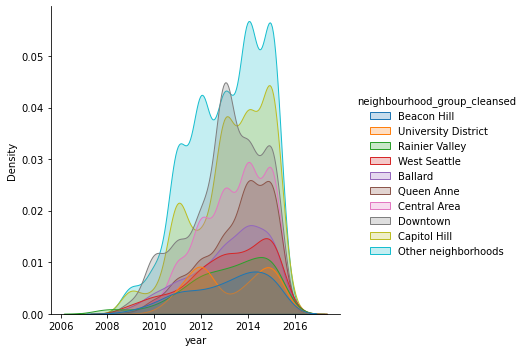

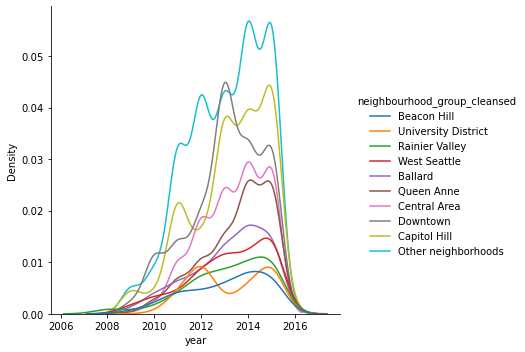

In [31]:
plot_varyear(df_listing, 'host_since','neighbourhood_group_cleansed')

### What are the types of properties by region?

Based on the first 10 neighborhoods with more growth during those years, we observed that outside the main points of seattle the properties offered by the application are mostly of houses. While Downton, Capitol Hill provide apartments

In [163]:
'''
I take the basis of the previous function to keep the top 10 points in Seattle and work with the
top 7 types of ownership of those points.
'''
dividing_property(base_vizinho)

,property_type,neighbourhood_group_cleansed,size
52,House,Other neighborhoods,496
6,Apartment,Downtown,469
2,Apartment,Capitol Hill,356
11,Apartment,Other neighborhoods,235
45,House,Central Area,216
12,Apartment,Queen Anne,169
43,House,Capitol Hill,168
41,House,Ballard,146
57,House,West Seattle,141
54,House,Rainier Valley,114


### Does it make a difference in the average score, being a super host or not?

We expected that the superhost might have a considerably high average score compared to ordinary hosts. However, we observed that the difference between their averages is not so high.

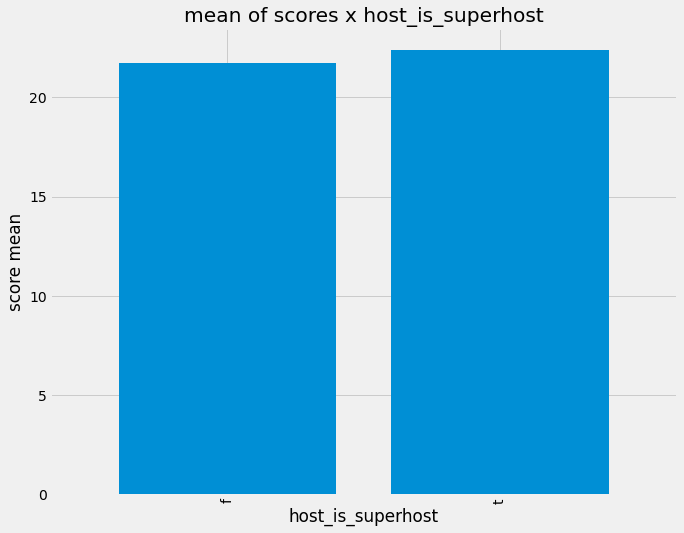

In [161]:
plot_media_scores('host_is_superhost')

## 6- Deployment

The result summary will be available on Medium: https://enzo-santanarocha.medium.com/se-hospedando-com-o-python-2ea7208dfd7a